In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# %pip install pybaseball

In [3]:
from pybaseball import playerid_lookup, statcast_batter

ohtani_id = playerid_lookup("ohtani", "shohei")
print(ohtani_id)

Gathering player lookup table. This may take a moment.
  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0    ohtani     shohei     660271  ohtas001  ohtansh01          19755   

   mlb_played_first  mlb_played_last  
0            2018.0           2024.0  


In [4]:
ohtani_stats = statcast_batter("2021-04-01", "2021-04-30", ohtani_id["key_mlbam"][0])

Gathering Player Data


In [5]:
df = ohtani_stats

In [6]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,CH,2021-04-30,82.9,-0.75,6.76,"Ohtani, Shohei",660271,623167,home_run,hit_into_play,...,2,3,2,Infield shift,Standard,216.0,-0.121,0.974,NaN,NaN
1,CH,2021-04-30,83.2,-0.79,6.72,"Ohtani, Shohei",660271,623167,NaN,ball,...,2,2,2,Infield shift,Standard,214.0,0.000,0.026,NaN,NaN
2,FC,2021-04-30,88.9,0.87,5.85,"Ohtani, Shohei",660271,664948,field_out,hit_into_play,...,5,3,5,Infield shift,Standard,187.0,0.013,-0.099,NaN,NaN
3,CU,2021-04-30,82.4,1.05,5.74,"Ohtani, Shohei",660271,664948,NaN,swinging_strike,...,5,3,5,Infield shift,Standard,144.0,0.000,-0.020,NaN,NaN
4,CU,2021-04-30,81.8,0.92,5.81,"Ohtani, Shohei",660271,664948,NaN,ball,...,5,3,5,Infield shift,Standard,324.0,0.000,0.016,NaN,NaN


In [7]:
# get the distribution of 9 zones for all types of pitches and plot this using 3x3 grid

zone_dist = df["zone"].value_counts().sort_index()

In [8]:
zone_dist

1     11
2     22
3      9
4     23
5     25
6     25
7     25
8     18
9     10
11    51
12    27
13    73
14    52
Name: zone, dtype: int64

In [9]:
zones_one_thru_nine = zone_dist[:9]
zones_eleven_thru_nineteen = zone_dist[9:14]

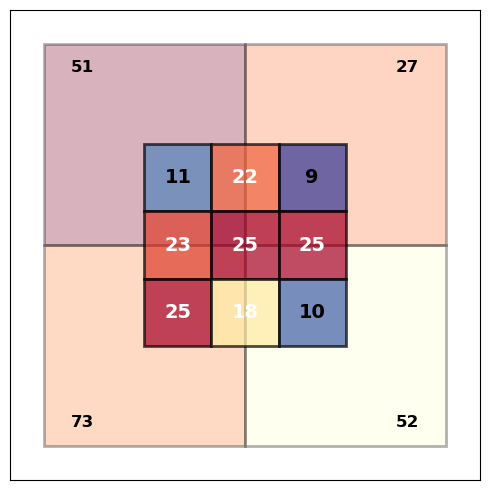

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# use mockup data for now
nine_zone_data = zones_one_thru_nine.values.reshape(3, 3)


four_zone_data = zones_eleven_thru_nineteen.values


fig, ax = plt.subplots(figsize=(5, 5))


cmap_4 = plt.cm.YlOrRd
norm_4 = plt.Normalize(vmin=min(four_zone_data), vmax=max(four_zone_data))

four_zone_positions = [(-1, -1), (2, -1), (-1, 2), (2, 2)]


four_zone_text_positions = [
    (-0.25, 4.75),
    (4.25, 4.75),
    (-0.25, -0.75),
    (4.25, -0.75),
]

for value, pos, text_pos in zip(
    four_zone_data, four_zone_positions, four_zone_text_positions
):
    color = cmap_4(norm_4(value))
    rect = plt.Rectangle(
        pos, 3, 3, facecolor=color, edgecolor="black", linewidth=2, alpha=0.3
    )
    ax.add_patch(rect)
    ax.text(
        text_pos[0],
        text_pos[1],
        str(int(value)),
        va=("top" if text_pos[1] > 0 else "bottom"),
        ha=("left" if text_pos[0] > 0 else "right"),
        color="black",
        fontsize=12,
        fontweight="bold",
    )


cmap_9 = plt.cm.RdYlBu_r
norm_9 = plt.Normalize(
    vmin=min(nine_zone_data.flatten()), vmax=max(nine_zone_data.flatten())
)


for i in range(3):
    for j in range(3):
        value = nine_zone_data[i, j]
        color = cmap_9(norm_9(value))

        rect = plt.Rectangle(
            (j + 0.5, 2.5 - i),
            1,
            1,
            facecolor=color,
            edgecolor="black",
            linewidth=2,
            alpha=0.7,
        )
        ax.add_patch(rect)
        text_color = "white" if norm_9(value) > 0.5 else "black"
        ax.text(
            j + 1,
            2.5 - i + 0.5,
            str(int(value)),
            va="center",
            ha="center",
            color=text_color,
            fontsize=14,
            fontweight="bold",
        )


ax.set_xlim(-1.5, 5.5)
ax.set_ylim(-1.5, 5.5)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()